# Michigan COVID Dataset

Note on deaths (04/13/21): Regular reviews of death certificate data maintained in Vital Records reporting systems are conducted by MDHHS staff three times per week. As a part of this process, records that identify COVID-19 infection as a contributing factor to death are compared against all laboratory confirmed cases of COVID-19 in the Michigan Disease Surveillance System (MDSS). If a death certificate is matched to a confirmed COVID-19 case and that record in the MDSS does not indicate the individual died, the MDSS record is updated to indicate the death and the appropriate local health department is notified. These matched deaths are then included with mortality information posted to the Michigan Coronavirus website. As a result of the most recent assessment, today's data includes 37 additional deaths identified by this methodology.

The State of Michigan is working around the clock to test and treat COVID-19 patients. Below is the most recent data healthcare experts across the state have compiled. It is updated Monday - Saturday. 

https://www.michigan.gov/coronavirus/0,9753,7-406-98163_98173---,00.html

# Import Libraries to read files

In [1]:
import pandas as pd
import seaborn as sns

# Read dataset

In [2]:
df_cases_death_by_county = pd.read_excel("//Users//kritikaversha//Agent_Based_Modeling_Mesa//Agent_Based_Modeling_MESA//data_exploration//Michigan_COVID_Dataset//Cases_and_Deaths_by_County_2021-04-13_722108_7.xlsx")
df_cases_death_by_symptom_onset = pd.read_excel("//Users//kritikaversha//Agent_Based_Modeling_Mesa//Agent_Based_Modeling_MESA//data_exploration//Michigan_COVID_Dataset//Cases_and_Deaths_by_County_and_by_Date_of_Symptom_Onset_or_by_Date_of_Death2021-04-13_722107_7.xlsx")
df_cases_by_statewide_demographic = pd.read_excel("//Users//kritikaversha//Agent_Based_Modeling_Mesa//Agent_Based_Modeling_MESA//data_exploration//Michigan_COVID_Dataset//Cases_by_Demographics_Statewide_2021-04-13_722106_7.xlsx")
df_covid19_test_by_county = pd.read_excel("//Users//kritikaversha//Agent_Based_Modeling_Mesa//Agent_Based_Modeling_MESA//data_exploration//Michigan_COVID_Dataset//Covid-19_Tests_by_County_2021-04-13_722104_7.xlsx")
df_diagnostic_result = pd.read_excel("//Users//kritikaversha//Agent_Based_Modeling_Mesa//Agent_Based_Modeling_MESA//data_exploration//Michigan_COVID_Dataset//Diagnostic_Tests_by_Result_and_County_2021-04-13_722101_7.xlsx")
df_michigan_population = pd.read_csv("//Users//kritikaversha//Agent_Based_Modeling_Mesa//Agent_Based_Modeling_MESA//data_exploration//Michigan_COVID_Dataset//Michigan_Population_By_County.csv", header=1)

In [3]:
df_michigan_population['County'] = df_michigan_population['County'].str.replace(' County','')
df_michigan_population = df_michigan_population.rename(columns={'County': 'COUNTY'})
df_michigan_population.drop(['Rank'], axis=1, inplace=True)
df_michigan_population.head()

,COUNTY,Population
0,Wayne,"1,757,299"
1,Oakland,"1,253,185"
2,Macomb,"870,325"
3,Kent,"648,121"
4,Genesee,"407,875"


In [4]:
df_cases_death_by_county = pd.merge(df_cases_death_by_county,df_michigan_population, on='COUNTY', how='inner' )
df_cases_death_by_county

,COUNTY,CASE_STATUS,Cases,Deaths,Updated,Population
0,Alcona,Confirmed,482,21,2021-04-13 13:29:38.774,"10,353"
1,Alcona,Probable,112,5,2021-04-13 13:29:38.774,"10,353"
2,Alger,Confirmed,297,1,2021-04-13 13:29:38.774,"9,151"
3,Alger,Probable,178,4,2021-04-13 13:29:38.774,"9,151"
4,Allegan,Confirmed,8211,99,2021-04-13 13:29:38.775,"116,143"
...,...,...,...,...,...,...
157,Washtenaw,Probable,2130,6,2021-04-13 13:29:38.822,"367,000"
158,Wayne,Confirmed,86548,2207,2021-04-13 13:29:38.823,"1,757,299"
159,Wayne,Probable,7240,122,2021-04-13 13:29:38.824,"1,757,299"
160,Wexford,Confirmed,2173,28,2021-04-13 13:29:38.824,"33,256"


In [5]:
df_cases_death_by_symptom_onset = df_cases_death_by_symptom_onset.pivot_table(index=['Date','COUNTY'], columns='CASE_STATUS', values=['Cases','Deaths','Cases.Cumulative','Deaths.Cumulative']).reset_index()
df_cases_death_by_symptom_onset.columns = df_cases_death_by_symptom_onset.columns.to_series().str.join('_')
df_cases_death_by_symptom_onset = df_cases_death_by_symptom_onset.rename(columns={'Date_': 'Date', 'COUNTY_':'COUNTY'})
df_cases_death_by_symptom_onset



,Date,COUNTY,Cases_Confirmed,Cases_Probable,Cases.Cumulative_Confirmed,Cases.Cumulative_Probable,Deaths_Confirmed,Deaths_Probable,Deaths.Cumulative_Confirmed,Deaths.Cumulative_Probable
0,2020-03-01,Alcona,0,0,0,0,0,0,0,0
1,2020-03-01,Alger,0,0,0,0,0,0,0,0
2,2020-03-01,Allegan,0,0,0,0,0,0,0,0
3,2020-03-01,Alpena,0,0,0,0,0,0,0,0
4,2020-03-01,Antrim,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
35987,2021-04-13,Unknown,0,0,3,18,0,0,0,0
35988,2021-04-13,Van Buren,3,4,5697,399,0,0,93,12
35989,2021-04-13,Washtenaw,7,6,21230,2130,0,0,251,6
35990,2021-04-13,Wayne,23,16,86548,7240,0,1,2207,121


In [6]:
df_covid19_test_by_county = df_covid19_test_by_county[df_covid19_test_by_county.TestType == 'Total'].head()
df_covid19_test_by_county

,COUNTY,TestType,Count,RatePerMillion,Updated
2,Alcona,Total,6623,636521.0,2021-04-13 13:29:54.936
5,Alger,Total,8109,890316.0,2021-04-13 13:29:54.936
8,Allegan,Total,111587,945004.0,2021-04-13 13:29:54.936
11,Alpena,Total,19452,684809.0,2021-04-13 13:29:54.936
14,Antrim,Total,21437,919096.0,2021-04-13 13:29:54.936


In [7]:
df_diagnostic_result

,COUNTY,MessageDate,Negative,Positive,Total
0,Alcona,2020-03-17,1,0,1
1,Alcona,2020-03-20,2,0,2
2,Alcona,2020-03-23,1,0,1
3,Alcona,2020-03-24,1,0,1
4,Alcona,2020-03-25,2,0,2
...,...,...,...,...,...
33268,Wexford,2021-04-08,85,40,125
33269,Wexford,2021-04-09,85,31,116
33270,Wexford,2021-04-10,59,23,82
33271,Wexford,2021-04-11,62,7,69


<AxesSubplot:xlabel='MessageDate', ylabel='Positive'>

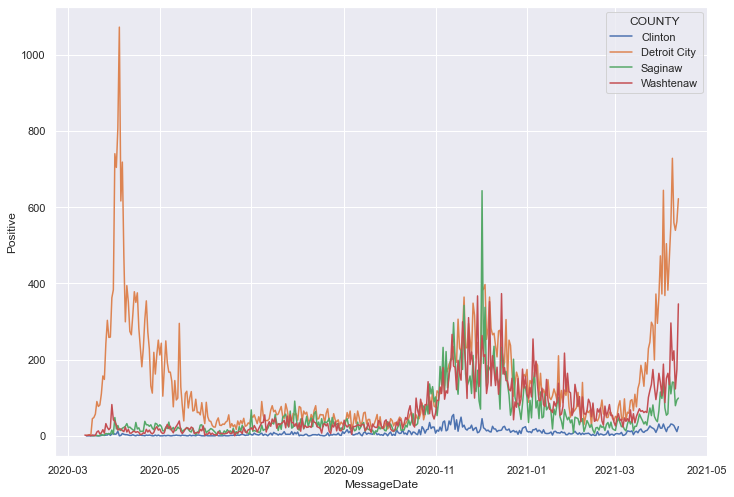

In [8]:
COUNTY_LIST = ['Washtenaw','Detroit City','Clinton','Saginaw']
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df_diagnostic_result[df_diagnostic_result.COUNTY.isin(COUNTY_LIST)], x="MessageDate", y="Positive", hue="COUNTY")

<AxesSubplot:xlabel='MessageDate', ylabel='Positive'>

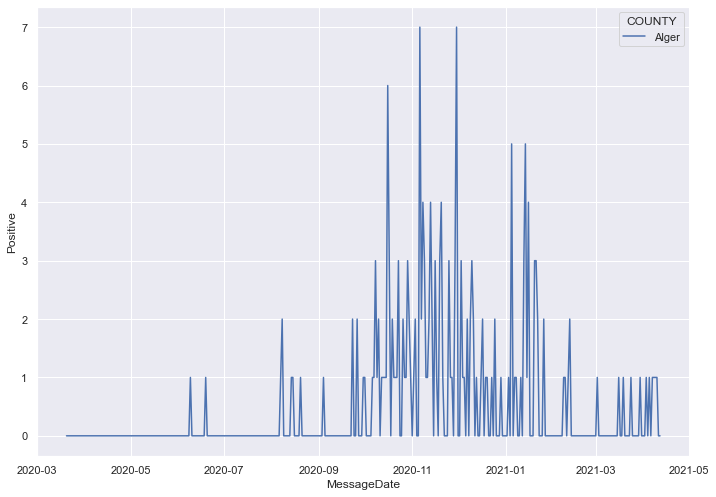

In [9]:
COUNTY_LIST = ['Alger']
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df_diagnostic_result[df_diagnostic_result.COUNTY.isin(COUNTY_LIST)], x="MessageDate", y="Positive", hue="COUNTY")

# Create a dataframe for Cases by County, Positive Test and Death

In [10]:
filtered_df = pd.merge(df_cases_death_by_symptom_onset, df_diagnostic_result, left_on=['COUNTY','Date'], right_on=['COUNTY','MessageDate'], how = 'inner')
filtered_df = pd.merge(filtered_df,df_michigan_population, on='COUNTY', how='inner' )
filtered_df = filtered_df[filtered_df.COUNTY == 'Alger']

filtered_df.loc[filtered_df['Positive']>0, 'F+ve'] = filtered_df['Positive'] - 1    
filtered_df['M+ve'] = filtered_df['Positive'] - filtered_df['F+ve']
filtered_df.loc[filtered_df['Negative']>0, 'F-ve'] = filtered_df['Negative'] - 1    
filtered_df['M-ve'] = filtered_df['Negative'] - filtered_df['F+ve']
filtered_df.loc[filtered_df['Deaths_Confirmed']>0, 'M_confirmed_deaths'] = filtered_df['Deaths_Confirmed'] - 1   
filtered_df['F_confirmed_deaths'] = filtered_df['Deaths_Confirmed'] - filtered_df['M_confirmed_deaths']

In [11]:
filtered_df.to_csv("//Users//kritikaversha//Agent_Based_Modeling_Mesa//Agent_Based_Modeling_MESA//data_exploration//Michigan_COVID_Dataset//covid_final.csv", index=False)

In [12]:
filtered_df

,Date,COUNTY,Cases_Confirmed,Cases_Probable,Cases.Cumulative_Confirmed,Cases.Cumulative_Probable,Deaths_Confirmed,Deaths_Probable,Deaths.Cumulative_Confirmed,Deaths.Cumulative_Probable,...,Negative,Positive,Total,Population,F+ve,M+ve,F-ve,M-ve,M_confirmed_deaths,F_confirmed_deaths
27639,2020-03-20,Alger,0,0,0,0,0,0,0,0,...,1,0,1,"9,151",NaN,NaN,0,NaN,NaN,NaN
27640,2020-03-25,Alger,0,0,0,0,0,0,0,0,...,1,0,1,"9,151",NaN,NaN,0,NaN,NaN,NaN
27641,2020-03-26,Alger,0,0,0,0,0,0,0,0,...,1,0,1,"9,151",NaN,NaN,0,NaN,NaN,NaN
27642,2020-03-27,Alger,0,0,0,0,0,0,0,0,...,1,0,1,"9,151",NaN,NaN,0,NaN,NaN,NaN
27643,2020-03-30,Alger,0,0,0,0,0,0,0,0,...,1,0,1,"9,151",NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27999,2021-04-08,Alger,1,0,295,176,0,0,1,4,...,6,1,7,"9,151",0.0,1.0,5,6.0,NaN,NaN
28000,2021-04-09,Alger,1,1,296,177,0,0,1,4,...,38,1,39,"9,151",0.0,1.0,37,38.0,NaN,NaN
28001,2021-04-10,Alger,0,0,296,177,0,0,1,4,...,6,1,7,"9,151",0.0,1.0,5,6.0,NaN,NaN
28002,2021-04-11,Alger,0,0,296,177,0,0,1,4,...,15,0,15,"9,151",NaN,NaN,14,NaN,NaN,NaN
